# Exploratory Data Analysis

In [12]:
# Importing relevant libraries

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import random
import os

In [14]:
# Exploring the training data

image_dir = r"..\data\train_set"

image_list = []
image_labels = []

for root,dirs, files in os.walk(image_dir):
    for file in files :
        if file.endswith(('png', 'jpg', 'jpeg')):
            image_list.append(Image.open(os.path.join(root, file)))
            # Extract the labels (subdirectory) as the image label
            label = os.path.basename(root)
            image_labels.append(label)

In [15]:
# Exploring Metadata

# Extracting Image dimensions
dimensions = [(img.size[0], img.size[1]) for img in image_list]
dimensions_df = pd.DataFrame(dimensions, columns=['Width', 'Height'])

#Obtain descriptive statistics for image dimensions
print(dimensions_df.describe())

            Width      Height
count  924.000000  924.000000
mean   210.783550  210.783550
std     36.603328   36.603328
min    128.000000  128.000000
25%    209.000000  209.000000
50%    224.000000  224.000000
75%    224.000000  224.000000
max    268.000000  268.000000


In [16]:
#Image modes

modes = [img.mode for img in image_list]
modes_df = pd.DataFrame(modes, columns=['Mode'])

# Display distribution of image modes
mode_distribution = modes_df['Mode'].value_counts()
print(mode_distribution)

Mode
RGB    924
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution of Image Heights')

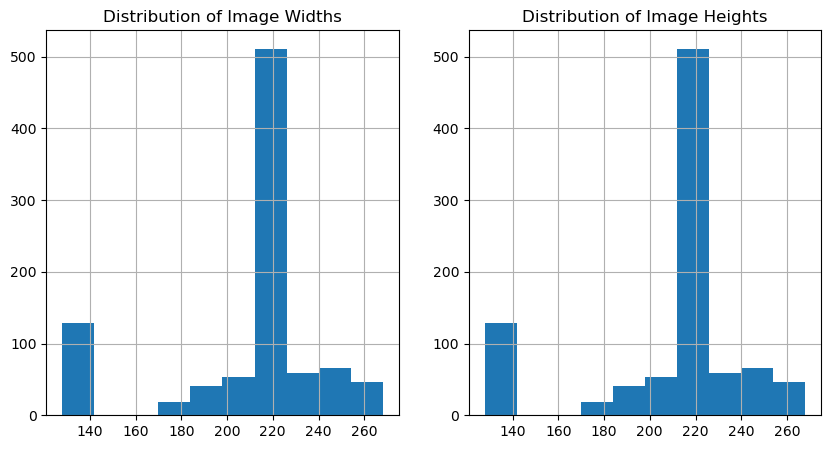

In [17]:
# Visualisation of image dimensions

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
dimensions_df['Width'].hist(bins=10)
plt.title('Distribution of Image Widths')

plt.subplot(1,2,2)
dimensions_df['Height'].hist(bins=10)
plt.title('Distribution of Image Heights')

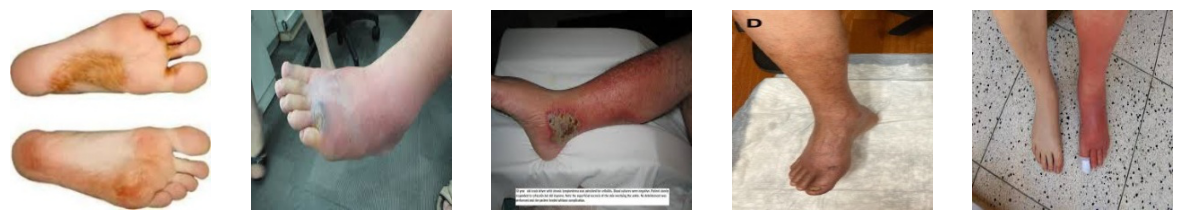

In [21]:
# Visualising Image Samples

import random

sample_images = random.sample(image_list, 5)

fig, axs = plt.subplots(1, 5, figsize=(15,5))

for i, img in enumerate(sample_images):
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()